In [61]:
#pip install wordcloud

In [62]:
#pip install missingno

In [63]:
#pip install cufflinks

In [64]:
# import warnings
# warnings.filterwarnings("ignore")

In [65]:
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
#import networkx as nx

# Plotly visualization 
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
# Required to use plotly offline in jupyter notebook
py.init_notebook_mode(connected = True) 

#importing plotly and cufflinks in offline mode  
import cufflinks as cf 
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

# Display markdown formatted output like bold, italic bold etc
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
    
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [66]:
data = pd.read_csv('bestsellers.csv')
data.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [68]:
# show numerical columns
data.describe()

User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

In [69]:
# show string type columns
data.describe(include=['O'])

Name       Author  \
count                                                 550          550   
unique                                                351          248   
top     Publication Manual of the American Psychologic...  Jeff Kinney   
freq                                                   10           12   

              Genre  
count           550  
unique            2  
top     Non Fiction  
freq            310

In [70]:
data.describe(include='all')

Name       Author  \
count                                                 550          550   
unique                                                351          248   
top     Publication Manual of the American Psychologic...  Jeff Kinney   
freq                                                   10           12   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

        User Rating       Reviews       Price         Year        Genre  
count    550.000000    550.000000  550.000000   550.000000          550  
unique          NaN           NaN         NaN          NaN            2  
top             NaN           NaN         NaN          NaN  Non Fiction  
freq            NaN           NaN         NaN          NaN          310  
mean       4.618364  11953.281818   13.100000  2014.000000          NaN  
std        0.226980  11731.132017   10.842262     3.165156          NaN  
min        3.300000     37.000000    0.000000  2009.000000          NaN  
25%        4.500000   4058.000000    7.000000  2011.000000          NaN  
50%        4.700000   8580.000000   11.000000  2014.000000          NaN  
75%        4.800000  17253.250000   16.000000  2017.000000          NaN  
max        4.900000  87841.000000  105.000000  2019.000000          NaN

## Check missing data with missingno

<Axes: >

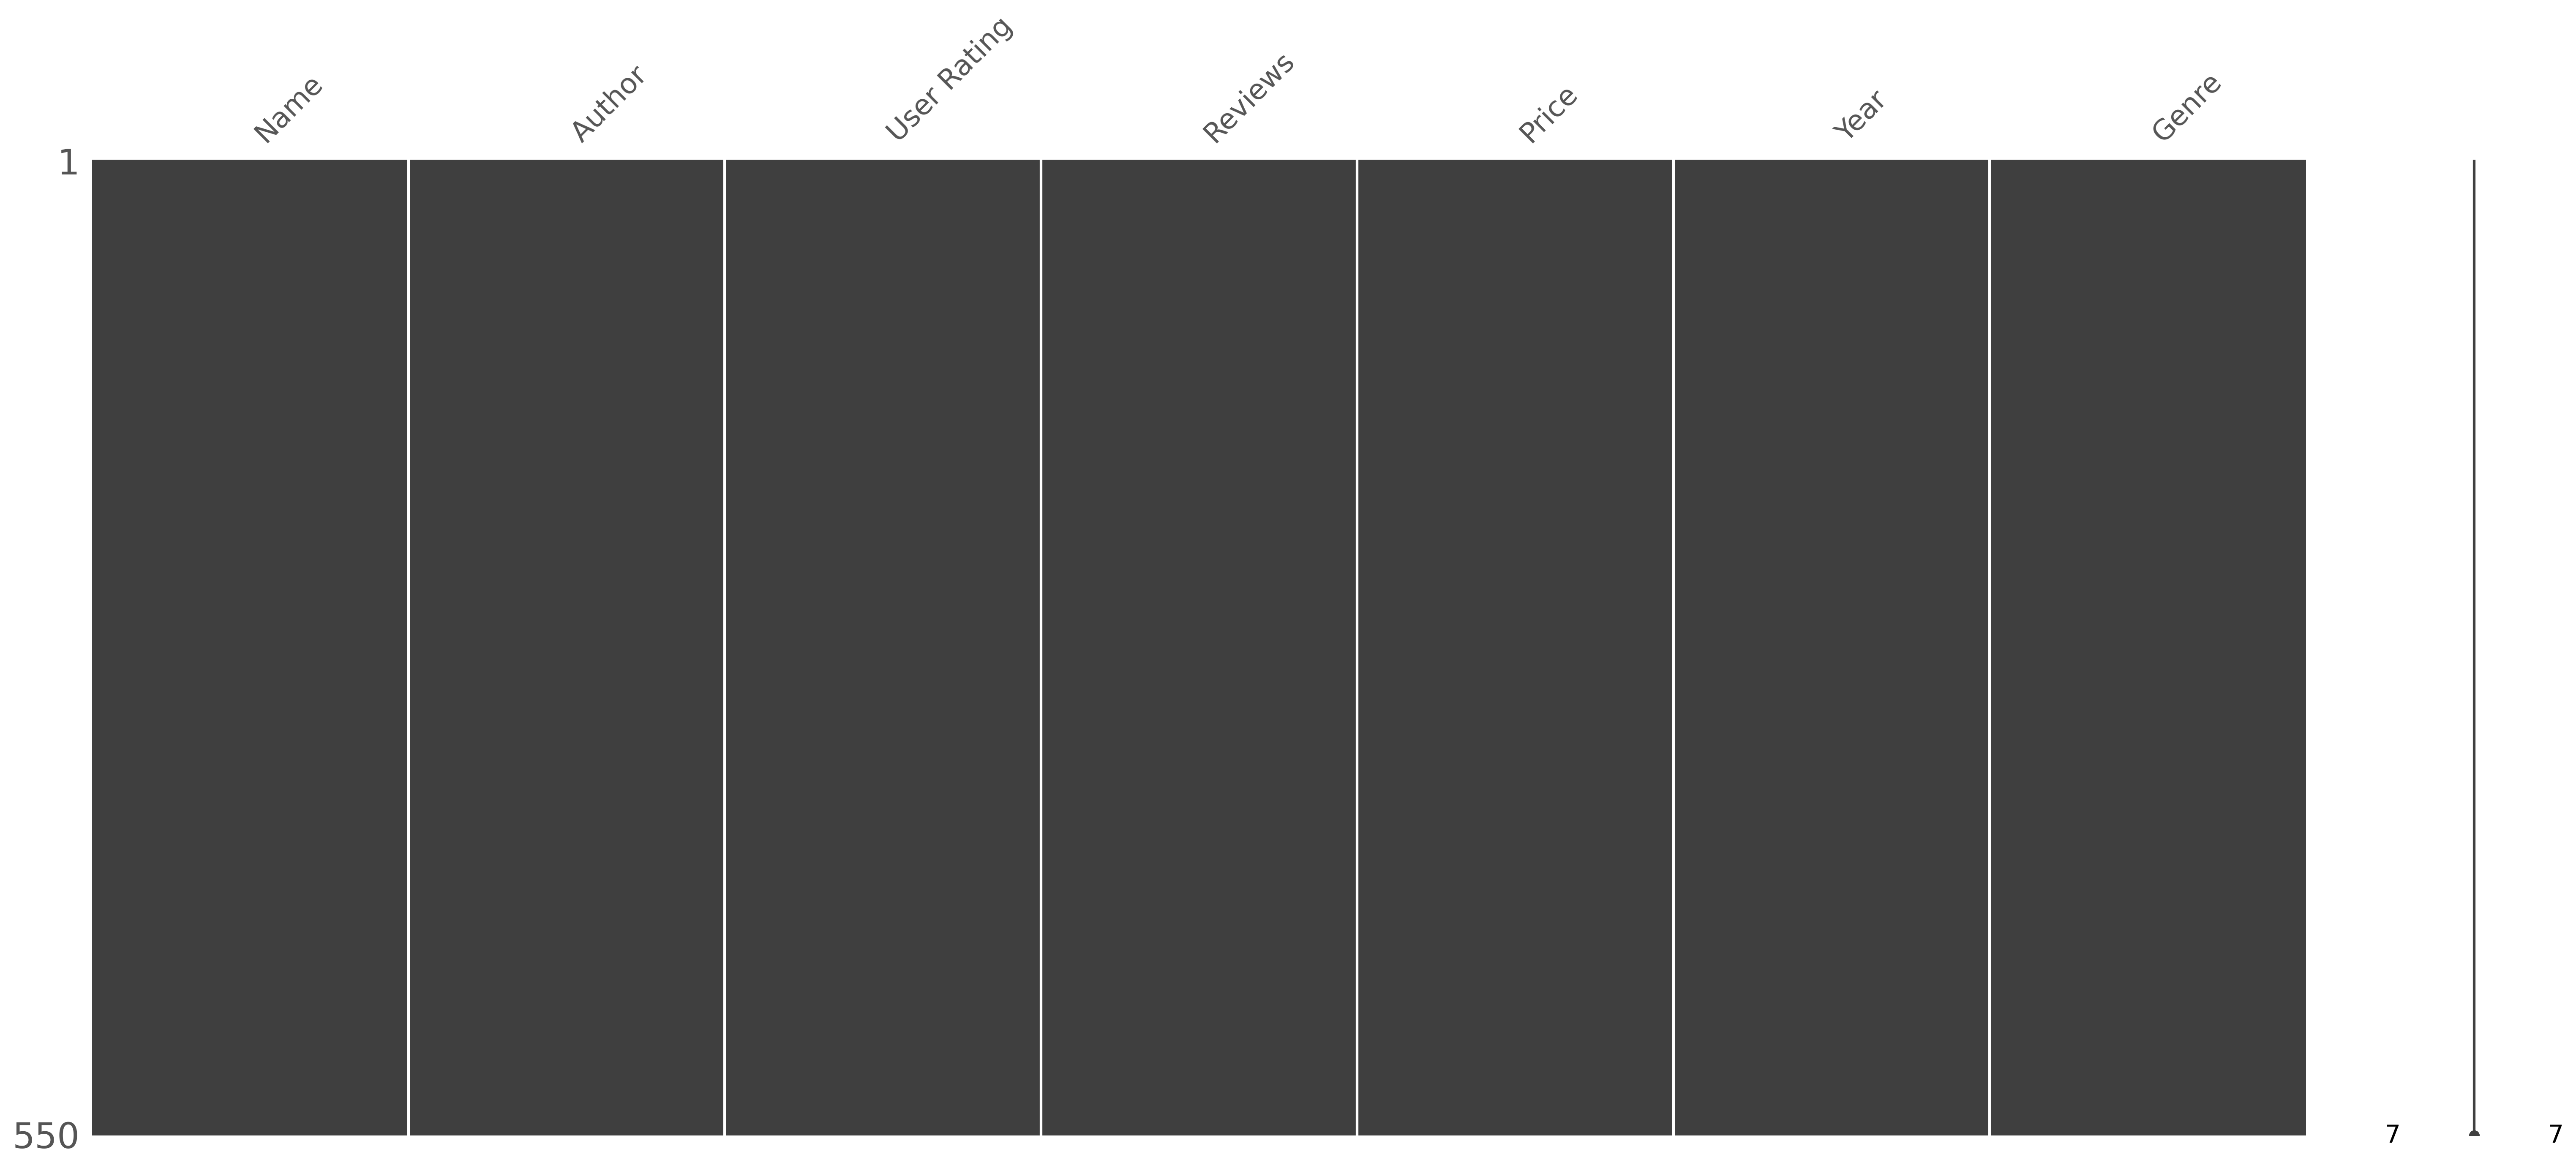

In [71]:
msno.matrix(data)

## Bestseller rating count

In [72]:
temp_df.head()

User Rating  count
0          4.8    127
1          4.7    108
2          4.6    105
3          4.5     60
4          4.9     52

In [73]:
temp_df = data['User Rating'].value_counts().reset_index()
bold("**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**")
# create trace1
trace1 = go.Bar(y = temp_df['count'], x = temp_df['User Rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATINGS COUNT' , 
                   xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()


**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**

In [74]:
def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo=['percent+value'], 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.3,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000', width=2)  ) 
                  )
    return trace
py.iplot([pie_plot(data['User Rating'].value_counts(), 'Rating')])

## Relationship between Price and User Rating

In [75]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='User Rating', ax=ax)
plt.show()

## Relationship between Price and Reviews

In [76]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='Reviews', color='b', ax=ax)
plt.show()

In [77]:
temp_df = data['Genre'].value_counts().reset_index()

trace1 = go.Bar(
                x = temp_df.index,
                y = temp_df['Genre'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark", xaxis = dict(title = 'Genre'), 
                   yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [78]:
def pie_plot(cnt_srs, colors, title):
    '''A Function To Plot Pie Plot using Plotly'''
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.3,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),  )
                  )
    return trace

bold("**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**")
py.iplot([pie_plot(data['Genre'].value_counts(), ['magenta', 'cyan'], 'GENRE')])

**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**

## Bestseller count based on genre over the years

In [79]:
d1.head()

Name               Author  \
1                                  11/22/63: A Novel         Stephen King   
3                             1984 (Signet Classics)        George Orwell   
5      A Dance with Dragons (A Song of Ice and Fire)  George R. R. Martin   
6  A Game of Thrones / A Clash of Kings / A Storm...  George R. R. Martin   
7                     A Gentleman in Moscow: A Novel          Amor Towles   

   User Rating  Reviews  Price  Year    Genre  
1          4.6     2052     22  2011  Fiction  
3          4.7    21424      6  2017  Fiction  
5          4.4    12643     11  2011  Fiction  
6          4.7    19735     30  2014  Fiction  
7          4.7    19699     15  2017  Fiction

In [80]:
d1 = data[data["Genre"] == "Fiction"]
d2 = data[data["Genre"] == "Non Fiction"]

# Fiction
vc1 = pd.DataFrame(data={'count' : d1.Year.value_counts() })
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_index()

# Non-Fiction
vc2 = pd.DataFrame(data={'count' : d2.Year.value_counts() })
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_index()

trace1 = go.Scatter(x=vc1.index, y=vc1["count"], name="Fiction", 
                        marker=dict(color = 'rgb(249, 6, 6)',
                        line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(x=vc2.index, y=vc2["count"], name="Non Fiction", 
                        marker= dict(color = 'rgb(26, 118, 255)',
                        line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', 
                   title = 'GENRE BASED BESTSELLERS COUNT OVER THE YEARS' , 
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),
                   template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

## Rating on genre

In [81]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = pd.DataFrame(data={'Rating':df1['User Rating'].value_counts()}).sort_index()
temp_df2 = pd.DataFrame(data={'Rating':df2['User Rating'].value_counts()}).sort_index()

trace1 = go.Bar(x = temp_df1.index, y = temp_df1['Rating'],
                name="Fiction", marker = dict(color = 'rgb(249, 172, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(x = temp_df2.index, y = temp_df2['Rating'],
            name = "Non Fiction", marker = dict(color = 'rgb(250, 0, 0)',
                         line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'RATING BY GENRE' , 
                   xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

## Top 9 multiple times bestsellers

In [82]:
common_books = data['Name'].value_counts()[:9].rename_axis('Common Books')\
.reset_index(name='count')

fig = px.treemap(common_books, path=['Common Books'], 
                 values='count',title='TOP 9 MULTIPLE TIMES BESTSELLERS')

fig.show()

## TOP 10 AUTHORS WITH MOST BESTSELLERS 

In [83]:
temp_df1 = data.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(10)

trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 AUTHORS WITH MOST BESTSELLERS ' , 
                   xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

## AUTHORS WITH BESTSELLERS IN BOTH THE GENRES:FICTION AND NON-FICTION

In [84]:
data[data['Author'].isin(list(data.groupby(['Author','Genre']).count().reset_index()\
                              ['Author'].value_counts()[:2].index))]

Name      Author  \
28                        Baby Touch and Feel: Animals          DK   
158                         Harry Potter Coloring Book  Scholastic   
268  Pokémon Deluxe Essential Handbook: The Need-to...  Scholastic   
514  Ultimate Sticker Book: Frozen: More Than 60 Re...          DK   

     User Rating  Reviews  Price  Year        Genre  
28           4.6     5360      5  2015  Non Fiction  
158          4.7     3564      9  2015  Non Fiction  
268          4.7     3503      9  2016      Fiction  
514          4.5     2586      5  2014      Fiction

## Top 3 authors with highest bestsellers in 2019

In [85]:
temp_df1=data[data['Year']==2019].groupby('Author').count().reset_index()\
.sort_values('Name',ascending=False).head(3)

trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 3 AUTHORS WITH HIGHEST BESTSELLERS IN 2019 ' , 
                   xaxis = dict(title = 'Author'), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [86]:
temp_df1=data[data['Year']==2019].groupby('User Rating').count().reset_index()\
.sort_values('Name',ascending=False)

trace1 = go.Bar(
                x = temp_df1['User Rating'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Ratings In 2019 ' , 
                   xaxis = dict(title = 'Ratings'), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

## create new dataframes based on the average rating of authors, the number of books written by authors, the number of reviews for books and the number of books by genre. We visualize the received information.

In [87]:
# We take all authors with the highest average rating
top_13_autors = data.groupby('Author')[['User Rating']].mean()\
                                                              .sort_values('User Rating', ascending=False)\
                                                              .head(13)\
                                                              .reset_index()
# We take the authors who have written the most bestsellers
number_of_books_written = data.groupby('Author')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

# We take books with the number of reviews
books_with_the_number_of_reviews = data.groupby('Name')[['Reviews']].sum()\
                                                                           .sort_values('Reviews', ascending=False)\
                                                                           .head(5)\
                                                                           .reset_index()

# We take the number of books by genre
number_of_books_by_genre = data.groupby('Genre')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

In [88]:
# Let's set the visualization parameters
fig_1 = make_subplots(rows=1, cols=1, subplot_titles=("")) # Let's set the number of rows and columns


# Setting table parameters
fig_1.add_trace(go.Table(columnorder = [1,2],
                         columnwidth = [100,50],
                         header=dict(values=top_13_autors.columns, 
                                     line_color='darkslategray',
                                     fill_color='Salmon',
                                     height=30),
                         cells=dict(values=[top_13_autors['Author'],
                                    top_13_autors['User Rating']], 
                                    line_color='darkslategray',
                                    fill_color='White')))

# Setting the parameters of the chart when displaying
fig_1.update_layout(showlegend=False, 
                    title_text='Top 13 best authors', 
                    title_font_size=16, 
                    title_font_family='Arial', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_1.show()

# Let's set the visualization parameters
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Top 10 authors by number of bestsellers", 
                                      "Top 5 books by number of reviews"))

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=number_of_books_written['Author'], 
                       y=number_of_books_written['Name'],
                       name ='Count books',
                       marker_color=['#ff6666','#f76e6e', '#f07575', '#e87d7d', '#e08585',
                                     '#d98c8c', '#d19494', '#c99c9c', '#c2a3a3', '#baabab']),
                       row=1, col=1)

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=books_with_the_number_of_reviews['Name'], 
                       y=books_with_the_number_of_reviews['Reviews'],
                       marker_color=['#ff6666','#f47171', '#e87d7d', '#dd8888', '#d19494'],
                       name ='Reviews'),
                       row=1, col=2)

# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_color='Gray',
                    marker_line_width=1)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_2.show()

# Let's set the visualization parameters
fig_3 = make_subplots(rows=1, cols=1,
                      specs=[[{'type': 'domain'}]],
                      subplot_titles=(""))

# Setting Pie parameters
fig_3.add_trace(go.Pie(values=number_of_books_by_genre['Name'],
                       title='Genre',
                       labels=['Non Fiction', 'Fiction'],
                       textinfo='label+percent',
                       insidetextorientation='radial',
                       hole=0.3,
                       marker=dict(colors=['Gray','Salmon'], 
                                   line_color='Gray', 
                                   line_width=1),
                       textfont={'color': '#FFFFFF', 'size': 12},
                       textfont_size=12))

# Setting the parameters of the chart when displaying
fig_3.update_layout(margin_t=30, 
                    showlegend=False, 
                    title_text='Count of books genre', 
                    title_x=0.5, 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_3.show()

In [93]:
' '.join(data['Author'].values)

"JJ Smith Stephen King Jordan B. Peterson George Orwell National Geographic Kids George R. R. Martin George R. R. Martin Amor Towles James Comey Fredrik Backman Fredrik Backman Larry Schweikart Jaycee Dugard Madeleine L'Engle Steve Harvey Adult Coloring Book Designs Blue Star Coloring Blue Star Coloring Coloring Books for Adults Ron Chernow Anthony Doerr Anthony Doerr Veronica Roth Chris Kyle Khaled Hosseini Glenn Beck Neil deGrasse Tyson Mark Twain DK Angie Grace Ina Garten Ina Garten Michelle Obama Michelle Obama Atul Gawande Ta-Nehisi Coates Ta-Nehisi Coates Bruce Springsteen Stephenie Meyer Glenn Beck Bill Martin Jr. Bill Martin Jr. Jeff Kinney Sasha O'Hara David Goggins Thomas Piketty Suzanne Collins Suzanne Collins Suzanne Collins Chrissy Teigen Francis Chan Francis Chan Francis Chan Kevin Kwan Marjorie Sarnat Marjorie Sarnat Abraham Verghese Abraham Verghese Brené Brown Malcolm Gladwell Charlaine Harris Charlaine Harris Charlaine Harris Rod Campbell Rod Campbell Rod Campbell Ro

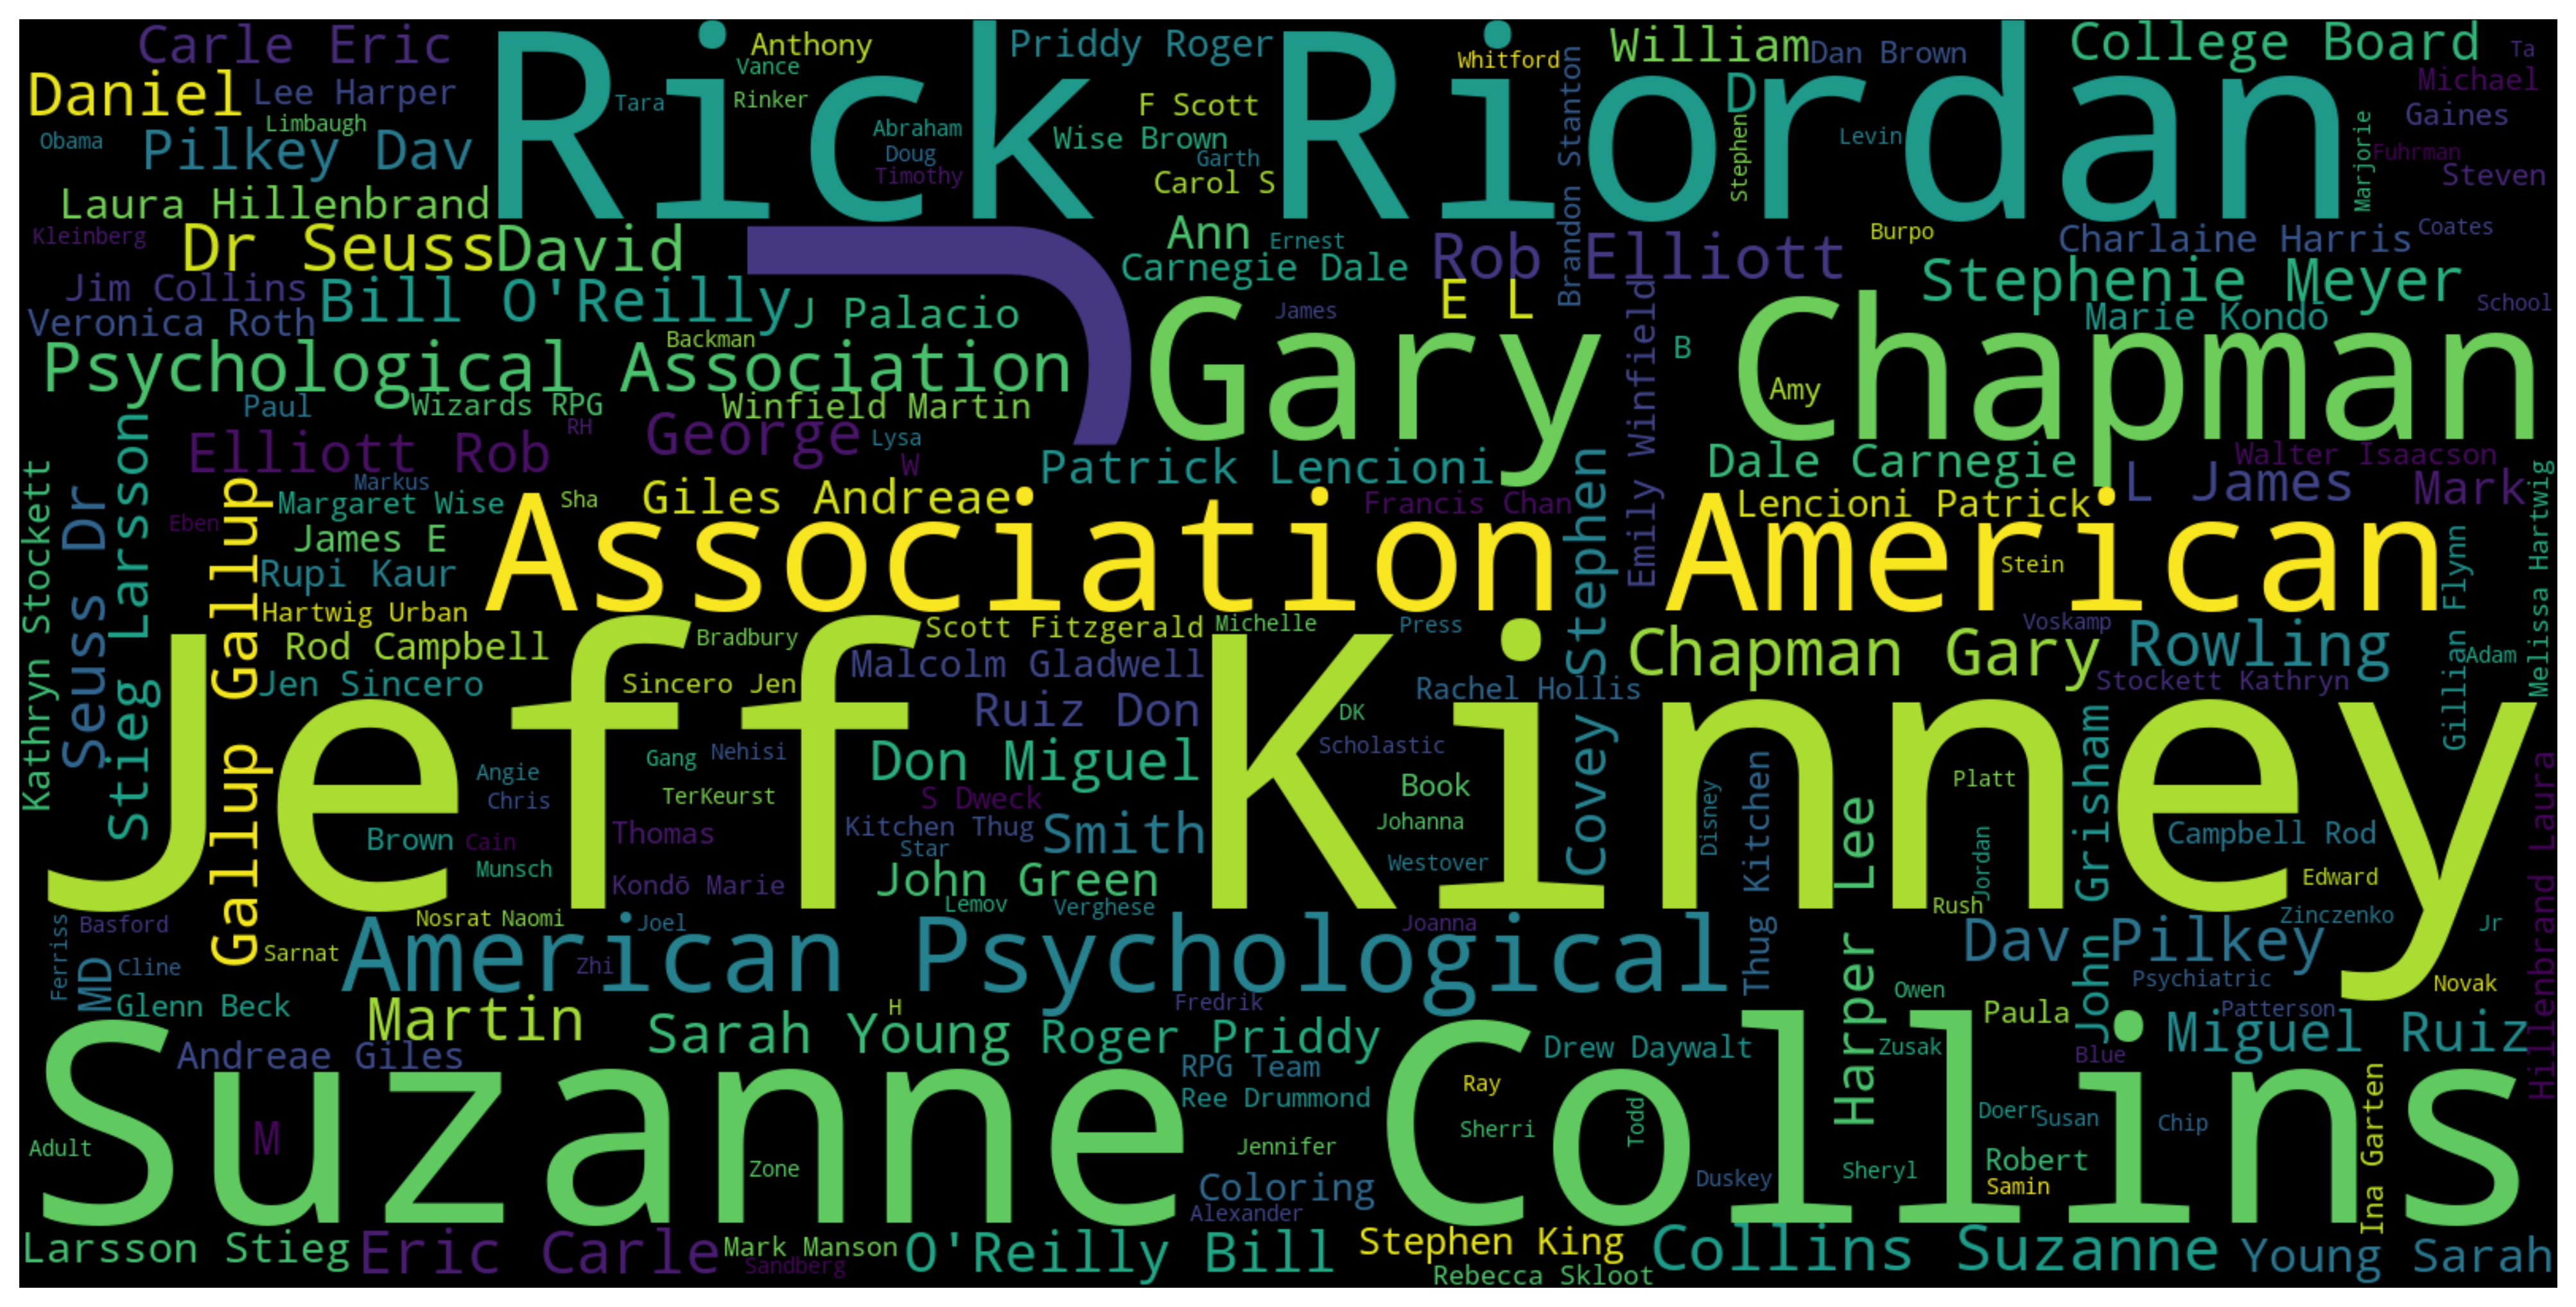

<Figure size 300x300 with 0 Axes>

In [105]:
text = ' '.join(data['Author'].values)
# Generate a word cloud image
wordcloud = WordCloud(width=1600,height=800).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(1,1))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
plt.show()